### Last name: Lee
### First name: Ho Seok
### Student number: 1004112177
### List of collaborators (if any): 
* Damrongpiriyapong, Soraphol
* Last name, first name
* Last name, first name

In this exercise narrated and partially prepared by me (Mohannad Shehadeh), we'll be continuing along the lines of the previous exercise but we'll also look at some cases where an explicit analytical solution to the optimization problem exists. 

Some facts will be stated without proofs or with incomplete proofs, but you will have the tools necessary to understand them by yourself and fill in the gaps by the last lecture of the course.

I've made the exercise short in recognition of the fact that exams are approaching.

In [1]:
using Convex
using SCS
using Plots
using LinearAlgebra

# Part 1: Least squares

The following cell will generate 30 slightly noisy points along the line $y = ax + b$.

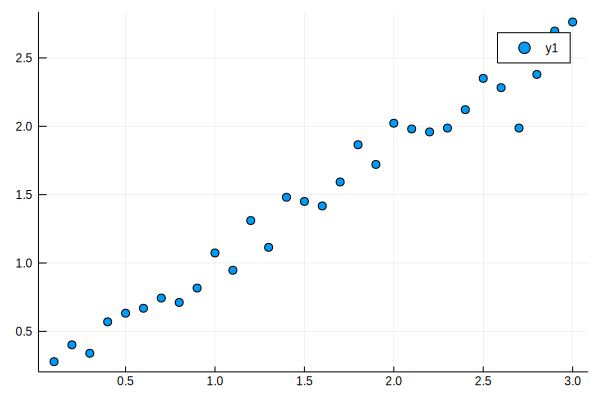

In [2]:
x = [i for i in 0.1:0.1:3]
a = 0.8
b = 0.2
y = a.*x .+ b .+ 0.1*randn(30)
scatter(x,y)

The following matrix will contain a column of ones and a column of the $x$ values. The purpose of the ones will be seen soon.

In [3]:
X = [ones(30,1) x]

30×2 Array{Float64,2}:
 1.0  0.1
 1.0  0.2
 1.0  0.3
 1.0  0.4
 1.0  0.5
 1.0  0.6
 1.0  0.7
 1.0  0.8
 1.0  0.9
 1.0  1.0
 1.0  1.1
 1.0  1.2
 1.0  1.3
 ⋮       
 1.0  1.9
 1.0  2.0
 1.0  2.1
 1.0  2.2
 1.0  2.3
 1.0  2.4
 1.0  2.5
 1.0  2.6
 1.0  2.7
 1.0  2.8
 1.0  2.9
 1.0  3.0

The following vector will contain the corresponding $y$ values. 

In [4]:
y

30-element Array{Float64,1}:
 0.27843752133187655
 0.4016231309836774 
 0.3399695006956938 
 0.5699496941368354 
 0.6329331200805787 
 0.6690876580481883 
 0.7438156261356352 
 0.7115771326288239 
 0.8169224566727752 
 1.073696423901516  
 0.9471191329277644 
 1.3107107563750033 
 1.1147258806831584 
 ⋮                  
 1.721009123036493  
 2.0226149472541053 
 1.9805020511866172 
 1.9588832225654218 
 1.986817396939745  
 2.1217090219106267 
 2.350590418207722  
 2.2824736108078185 
 1.987058551470434  
 2.3793259783517846 
 2.696388399710386  
 2.7626942752258055 

We seek to find the line $w_1+w_2x = \begin{bmatrix}1 & x\end{bmatrix}\begin{bmatrix}w_1 \\ w_2\end{bmatrix}$  which best fits the data in the following sense: 


Let $w = \begin{bmatrix}w_1 & w_2\end{bmatrix}^T$ and let $X \in R^{30 \times 2}$ and $y \in R^{30}$ be the matrix and vector defined in the previous two cells. 

We would like to minimize 

$$\sum_{i=1}^{30}(y_i - (w_1+w_2X_{i,2}))^2 = ||y - Xw||_2^2$$ 

with respect to $w \in R^2$.


**Exercise:** Using ```Convex``` as you learned to in the previous numerical exercise, find the optimizing value of $w \in R^2$ and store it in a variable called ```w_star_1```.  

In [5]:
# BEGIN SOLUTION
w = Variable(2)

objective = sumsquares(y - X*w)

constraints = [w > 0]

problem = minimize(objective, constraints)
solve!(problem, SCSSolver())

w_star_1 = w.value
p_1 = problem.optval

----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 68, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 5, constraints m = 38
Cones:	primal zero / dual free vars: 1
	linear vars: 3
	soc vars: 34, soc blks: 2
Setup time: 7.66e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 8.62e-01  9.93e-01  8.65e-01 -5.35e+00  1.04e+00  3.92e-15  4.71e-05 
    40| 5.51e-09  1.01e-08  1.14e-08  4.59e-01  4.59e-01  4.64e-16  2.07e-04 
-----------------------------------------

0.4585816481966133

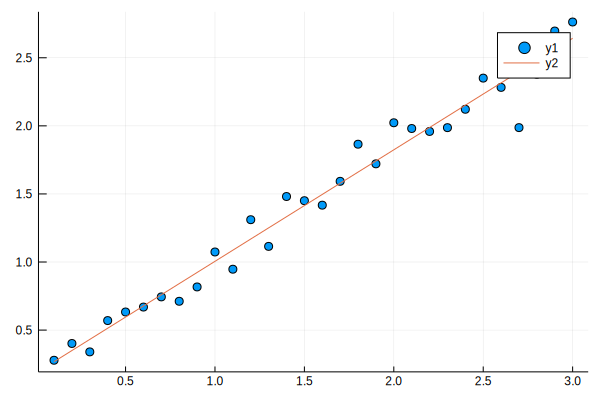

In [6]:
scatter(x,y)
plot!(x, w_star_1[1] .+ w_star_1[2].*x)

Suppose we seek to find the minimum of $||y - Xw||_2^2$ with respect to $w \in R^n$ where $X \in R^{m\times n}$ and $y \in R^m$. Provided that $X$ is full rank, it can be shown that the minimum is given by 

\begin{equation}
    w^* = (X^T X)^{-1} X^T y
\end{equation}

This result can be obtained by calculus analogously to how you solved optimization problems by taking derivatives and setting them to zero in high school. In particular, 

\begin{equation}
    ||y - Xw||_2^2 = (y - Xw)^T(y - Xw) = y^Ty - 2w^TX^Ty + w^TX^TXw
\end{equation}

and taking the gradient with respect to $w$ and setting the result to zero yields 

\begin{equation}
    2X^TXw = 2X^Ty 
\end{equation}

from which the result follows. 

Moreover, you can show that the rank of $X^TX$ is equal to the rank of $X$ which verifies that we can take an inverse of $X^TX$ when $X$ is full rank. (A non-square matrix is said to be full rank when the number of linearly independent columns is as large as it can be.)

In [7]:
rank(X)

2

In [8]:
rank(X'*X)

2

**Exercise:** Solve the optimization problem for $w \in R^2$ using the formula just stated and store the result in a variable called ```w_star_2```. (This is a one-liner). 

In [9]:
# BEGIN SOLUTION
w_star_2 = inv(X'*X)*X'*y

2-element Array{Float64,1}:
 0.18610215072045264
 0.8190155305540998 

In [10]:
norm(w_star_1-w_star_2)

1.4574243939603315e-8

In [11]:
@assert norm(w_star_1-w_star_2) < 1e-5

The matrix $(X^T X)^{-1} X^T$ is called the Moore–Penrose pseudoinverse of $X$ and is often denoted $X^+$. So the solution is given by $w^* = X^+y$. A Moore–Penrose pseudoinverse actually exists even when $X$ is not full rank but will not be given by $(X^T X)^{-1} X^T$ in that case. We'll get back to this topic after a few more questions. 

----------------

In this next part, we'll be looking at the problem of fitting a polynomial to data. We generate synthetic data by adding random noise to $8$ points taken from a cubic polynomial with some points having a little bit of noise and some having strong noise.

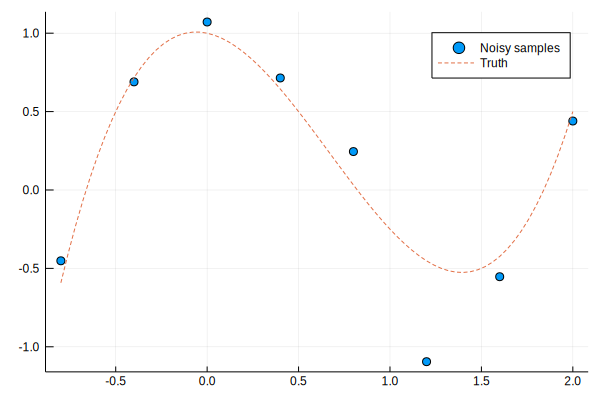

In [12]:
x = [i for i in -0.8:0.4:2.0]
x_fine = [i for i in -0.8:0.04:2.0]
a = 1
b = -2
c = -0.25
d = 1
noise = [(i%3 == 0) ? randn() : 0.1*randn() for i = 1:8]
y = a.*x.^3 .+ b.*x.^2 + c.*x .+ d .+ noise
y_underlying = a.*x_fine.^3 .+ b.*x_fine.^2 + c.*x_fine .+ d 
scatter(x,y,label="Noisy samples")
plot!(x_fine,y_underlying,linestyle=:dash,label="Truth")

In practice, we don't know what degree polynomial we'll need to fit the data well so we'll assume a large degree noting that lower degree polynomials can be obtained from higher degree polynomials by setting the coefficients of the higher degree terms to zero. 

We'll attempt to fit a degree $6$ polynomial to the data $w_1 + w_2x + w_3x^2 + w_4x^3 + w_5x^4 + w_6x^5 + w_7x^6$.

Let $x_1, \dots, x_8$ and $y = \begin{bmatrix}y_1 & \dots & y_8\end{bmatrix}$ be our data points. Let $w = \begin{bmatrix}w_1 & \dots & w_7\end{bmatrix}$ be the parameters we'd like to optimize with respect to.

We define the matrix 

\begin{equation}
    X = 
    \begin{bmatrix}
        1 & x_1 & x_1^2 & x_1^3 & \dots & x_1^6\\
        1 & x_2 & x_2^2 & x_2^3 & \dots & x_2^6 \\
        \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
        1 & x_8 & x_8^2 & x_8^3 & \dots & x_8^6 \\      
    \end{bmatrix}
\end{equation}. 

Let $f(x) = w_1 + w_2x + w_3x^2 + w_4x^3 + w_5x^4 + w_6x^5 + w_7x^6$. As with fitting the line, we seek to minimize the sum of the squared errors between the data and the function $f(x)$ which will be given by

$$\sum_{i=1}^{8}(y_i - f(x_i))^2 = ||y - Xw||_2^2$$ 


We define the $X$

In [13]:
X = [x.^0 x.^1 x.^2 x.^3 x.^4 x.^5 x.^6]

8×7 Array{Float64,2}:
 1.0  -0.8  0.64  -0.512   0.4096  -0.32768   0.262144
 1.0  -0.4  0.16  -0.064   0.0256  -0.01024   0.004096
 1.0   0.0  0.0    0.0     0.0      0.0       0.0     
 1.0   0.4  0.16   0.064   0.0256   0.01024   0.004096
 1.0   0.8  0.64   0.512   0.4096   0.32768   0.262144
 1.0   1.2  1.44   1.728   2.0736   2.48832   2.98598 
 1.0   1.6  2.56   4.096   6.5536  10.4858   16.7772  
 1.0   2.0  4.0    8.0    16.0     32.0      64.0     

In [14]:
rank(X'*X)

7

We see that it's full rank so we can obtain the solution by the Moore–Penrose pseudoinverse as in the previous part. 

**Exercise:** Solve the optimization problem for $w \in R^7$ using the Moore–Penrose pseudoinverse formula and store the result in a variable called ```w_star_1```. (This is a one-liner). 

In [15]:
# BEGIN SOLUTION
w_star_1 = inv(X'*X)*X'*y

7-element Array{Float64,1}:
  0.9521687346170432
  0.5288843005374648
 -0.5880778740491652
 -2.381372853289838 
 -1.2883653880724917
  3.1983289258015186
 -0.9670908986231797

The following code will plot the function we fitted. It should be pretty bad unless you were really lucky with the random noise. If it's not bad, re-run the code starting from the cell which generates the data. 

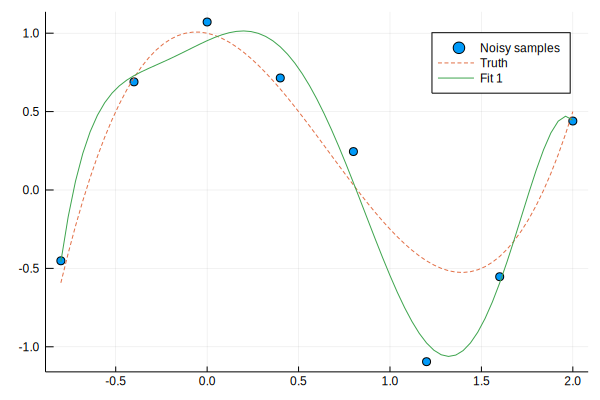

In [16]:
scatter(x,y, label="Noisy samples")
plot!(x_fine,y_underlying,linestyle=:dash,label="Truth")
y_hat_1 = [x_fine.^0 x_fine.^1 x_fine.^2 x_fine.^3 x_fine.^4 x_fine.^5 x_fine.^6]*w_star_1
plot!(x_fine, y_hat_1, label="Fit 1")

Let's now change our objective function from $$||y - Xw||_2^2$$ 

to

$$||y - Xw||_2^2 + \lambda||w||_1$$

You can choose $\lambda$ to be $0.1$ or $0.2$ or $0.3$ or something close to those. 

**Exercise:** Solve this new optimization problem for the minimizing $w \in R^7$ using ```Convex``` and store the result in a variable called ```w_star_2```.

In [17]:
# BEGIN SOLUTION
w = Variable(7)

objective = sumsquares(y - X*w) + 0.1*sum(w)

constraints = [w > -10]

problem = minimize(objective, constraints)
solve!(problem, SCSSolver())

w_star_2 = w.value
p_2 = problem.optval

----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 70, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 10, constraints m = 21
Cones:	primal zero / dual free vars: 1
	linear vars: 8
	soc vars: 12, soc blks: 2
Setup time: 2.72e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 7.31e+01  2.48e+01  9.81e-01 -8.26e+02 -7.24e+00  3.04e-13  2.15e-05 
   100| 5.48e-02  7.81e-03  1.65e-02 -2.10e-02 -3.85e-02  4.42e-15  5.56e-04 
   200| 1.05e-01  6.18e-03  1.45e-01 -2.

0.05430880273019484

The following will plot the polynomials obtained by both the first and second choices of objective functions. 
Note that if you let $\lambda = 0$, both of these should be exactly the same. You can experiment with changing $\lambda$ to see how it affects the second polynomial. You can also re-run all of the code starting from the cell which randomly generates the data to see other examples of what this could look like. 

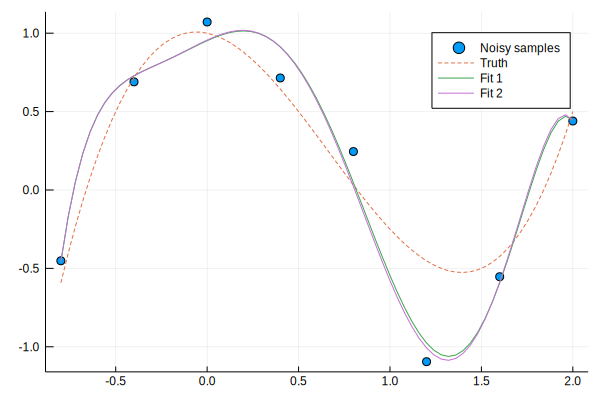

In [18]:
scatter(x,y,label="Noisy samples")
plot!(x_fine,y_underlying,linestyle=:dash,label="Truth")
y_hat_2 = [x_fine.^0 x_fine.^1 x_fine.^2 x_fine.^3 x_fine.^4 x_fine.^5 x_fine.^6]*w_star_2
plot!(x_fine, y_hat_1, label="Fit 1")
plot!(x_fine, y_hat_2, label="Fit 2")

**Exercise:** Re-run all of the code starting from the cell which randomly generates the data points a few times so that you get a look at a few examples of what the previous plot looks like. What is the effect of the $1$-norm term and changing $\lambda$?

Answer: The 1-norm term minimizes the value of or "length" of ```w```, at the same time as the error of the estimation. $\lambda$ determines how "important" it is to minimize the value of ```w```. With a low value for $\lambda$, the two solutions are nearly identical. For larger values, a larger difference can be seen.

----------

We'll now revisit the part of the last numerical exercise where we computed the projection of a vector onto the span of the columns of a rank $2$ matrix. We're gonna rename that matrix from $V$ to $X$

In [19]:
X = [1.0  1.0  0.0  0.0;
 -1.0  0.0  1.0  0.0;
  1.0  1.0  0.0  0.0]

3×4 Array{Float64,2}:
  1.0  1.0  0.0  0.0
 -1.0  0.0  1.0  0.0
  1.0  1.0  0.0  0.0

In [20]:
rank(X)

2

We seek to find the projection of this vector

In [21]:
v = [4,7,7]

3-element Array{Int64,1}:
 4
 7
 7

onto the span of the columns of $X$ and we know that the answer is 

In [22]:
v_hat_ref = [5.5, 7.0, 5.5]

3-element Array{Float64,1}:
 5.5
 7.0
 5.5

In particular, we'd like to minimize $||v-Xb||_2^2$ with respect to $b \in R^4$.

(Note that this is the same as minimizing $||v-Xb||_2$)

Once the minimizing $b^*$ is found, the projection is $\hat v = Xb^*$.

We can't use the Moore–Penrose pseudoinverse formula given before because $X$ is not full rank making $X^TX$ not invertible. 

Moreover, the optimal $b^*$ is not unique! Given one solution, we can add any element of the kernel of $X$ to it and get another solution. 

However, I claim that a thing called the Moore–Penrose pseudoinverse $X^+$ exists and gives an optimal solution as $b^* = X^+v$.

The Julia function for obtaining this is called ```pinv```. 

When $X$ is full rank, this function will just return something equal to $(X^H X)^{-1} X^H$ which is the same as what we had before. When $X$ is not full rank, it will do something else which we'll get to in a moment. 

In [23]:
b_star = pinv(X)*v

4-element Array{Float64,1}:
 -0.4999999999999989
  5.999999999999999 
  6.499999999999998 
  0.0               

In [24]:
v_hat = X*b_star

3-element Array{Float64,1}:
 5.5              
 6.999999999999997
 5.5              

But, as just noted, there are infinitely many possible $b$ which solve the optimization problem. For example, the last entry of $b$ can be whatever we want since the last column of $X$ is zero. Which solution $b$ does the Moore–Penrose pseudoinverse yield? The answer is that it gives the $b$ which has minimum $2$-norm. 

But is the minimum $2$-norm solution unique? The answer is yes, and you can try to prove it now if you'd like, it's well within your reach. 

In [25]:
@assert norm(v_hat_ref-v_hat) < 10^-4

Let's now look at how you go about computing the Moore–Penrose pseudoinverse in general including when $X$ is not full rank.

It's okay if you don't fully understand everything in this section since it will involve things that might not be covered in class or will be covered later, but the material here is well within your reach so you should be able to understand and fill in the gaps by the last lecture of the course. 

The question at the end will be extremely simple and will rely only on the parts that you should certainly understand. 

We'll start by defining the Moore–Penrose pseudoinverse as defined by Sir Roger Penrose. If you're interested in the proofs that will be omitted, refer to [this link](https://en.wikipedia.org/wiki/Proofs_involving_the_Moore%E2%80%93Penrose_inverse).

The Moore–Penrose pseudoinverse of a matrix $X \in C^{m\times n}$ is a matrix $X^+ \in C^{n \times m}$ satisfying
- $X X^+ X = X$
- $X^+ X X^+ = X^+$
- $(XX^+)^H = XX^+$
- $(X^+ X)^H = X^+ X$

A matrix $X^+$ satisfying these properties can be shown to be unique. 

A matrix $X^+$ satisfying these properties also always exists for *any* matrix $X \in C^{m\times n}$ as we will see. 

Moreover, if $X$ is full rank, you can easily verify that $X^+ = (X^HX)^{-1}X^H$ satisfies all of these properties.

In this case, $X^+$ is a *left inverse* satisfying $X^+X = (X^HX)^{-1}X^HX = I$. 

In the case that $X$ is not full rank, a pseudoinverse still exists, but it is certainly not a left inverse. Nonetheless, we're still interested in it because, as we will show in a moment, it solves least squares problems.  

Let's consider two trivial cases of Moore–Penrose pseudoinverses:

- Suppose you have an all zeros rectangular matrix. It's easy to see that its transpose is its Moore–Penrose pseudoinverse, it satisfies all of the properties we need.
- Suppose you have a square invertible matrix. It's again clear to see that its inverse is its Moore–Penrose pseudoinverse.

Let's now consider another trivial case, the problem of finding the Moore–Penrose pseudoinverse of a nonsquare diagonal matrix. A nonsquare diagonal matrix is essentially one which contains a square diagonal matrix with a zero matrix appended to the right or to the bottom. Equivalently, it's simply one which only has nonzero entries where the row index and column index are the same. 

Here's an example:

In [26]:
M=[2.0 0.0 0.0 0.0 0.0 0.0; 0.0 4.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.5 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0]

4×6 Array{Float64,2}:
 2.0  0.0  0.0  0.0  0.0  0.0
 0.0  4.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.5  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

You can easily verify that if you just replace each term on the diagonal with its reciprocal and transpose the matrix, you get a pseudoinverse. 

In [27]:
M_plus=[1.0/2.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0/4.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0/0.5 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0]'

6×4 Adjoint{Float64,Array{Float64,2}}:
 0.5  0.0   0.0  0.0
 0.0  0.25  0.0  0.0
 0.0  0.0   2.0  0.0
 0.0  0.0   0.0  0.0
 0.0  0.0   0.0  0.0
 0.0  0.0   0.0  0.0

We can verify the first property:

In [28]:
M*M_plus*M

4×6 Array{Float64,2}:
 2.0  0.0  0.0  0.0  0.0  0.0
 0.0  4.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.5  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

And the second:

In [29]:
M_plus*M*M_plus 

6×4 Array{Float64,2}:
 0.5  0.0   0.0  0.0
 0.0  0.25  0.0  0.0
 0.0  0.0   2.0  0.0
 0.0  0.0   0.0  0.0
 0.0  0.0   0.0  0.0
 0.0  0.0   0.0  0.0

And the last two:

In [30]:
@assert (M_plus*M_plus')' == M_plus*M_plus'
@assert (M_plus'*M_plus)' == M_plus'*M_plus

And you can easily prove that this holds in general for any nonsquare diagonal matrix or diagonal matrix.

Before showing one way of obtaining $X^+$ for a non full rank $X$ in general, let's assume we have an $X^+$ satisfying the definition. 

I claim that $b = X^+v$ minimizes $||v-Xb||_2^2$, i.e., 

\begin{equation}
    ||v-Xw||_2^2 \geq ||v-Xb||_2^2
\end{equation}

for all $w$.

Let's assume things are real (though the proof for the complex case is essentially the same). You can verify that 

\begin{equation}
  ||v-Xw||_2^2 = ||v-Xw + Xb - Xb||_2^2 = ||v-Xb||_2^2 + 2(b-w)^T X^T(v-Xb) + ||X(b-w)||_2^2
\end{equation}

Moreover, from the properties of the pseudoinverse, we have

\begin{equation}
    X^T(v-Xb) = X^Tv-X^TXX^+v = (X X^+ X )^Tv-X^TXX^+v = X^T(X X^+)^T v-X^TXX^+v = 0
\end{equation}

so the middle term vanishes and we're left with 

\begin{equation}
    ||v-Xw||_2^2 = ||v-Xb||_2^2 + ||X(b-w)||_2^2 \geq ||v-Xb||_2^2
\end{equation}

with equality when $w = b$. So now we know that the pseudoinverse will indeed give us a least squares solution if we can find it. 

It can further be shown that $b$ is the minimizer with minimum $2$-norm.  

We can now get to the question of how you obtain $X^+$ when $X$ is not full rank. 

One way is via the Singular Value Decomposition (SVD) which will be covered in class. The SVD is a tool of remarkable practical and mathematical utility and its application to finding the Moore–Penrose pseudoinverse is just one of many applications.

All you need to do now is to believe that this decomposition exists and the existence of a pseudoinverse for rank deficient matrices will follow. 

The SVD exists for any matrix $X \in C^{m\times n}$. In particular,  $X$ can be written as 

\begin{equation}
    X = U \Sigma V^H
\end{equation}

where 
- $U \in C^{m\times m}$ is a matrix whose columns are the orthonormal eigenvectors of $XX^H$ and are called the left-singular vectors.
- $V \in C^{n\times n}$ is a matrix whose columns are the orthonormal eigenvectors of $X^HX$ and are called the right-singular vectors.
- $\Sigma \in R^{m \times n}$ is a not necessarily square diagonal matrix whose diagonal entries are called singular values. Singular values are square roots of the eigenvalues common to both $XX^H$ and $X^HX$

You've already seen that if a square matrix has orthonormal columns, multiplication by its (Hermitian) transpose yields the identity matrix so you should also note that $U^H = U^{-1}$ and $V^H = V^{-1}$. 

We obtain the SVD of $X$ using the appropriate Julia function:

In [31]:
U = svd(X, full=true).U

3×3 Array{Float64,2}:
 -0.627963  -0.325058   0.707107   
  0.459701  -0.888074   1.11022e-16
 -0.627963  -0.325058  -0.707107   

In [32]:
Σ = [diagm(svd(X, full=true).S) zeros(3,1)]

3×4 Array{Float64,2}:
 2.17533  0.0      0.0  0.0
 0.0      1.12603  0.0  0.0
 0.0      0.0      0.0  0.0

In [33]:
V = svd(X, full=true).V

4×4 Adjoint{Float64,Array{Float64,2}}:
 -0.788675   0.211325   0.57735  0.0
 -0.57735   -0.57735   -0.57735  0.0
  0.211325  -0.788675   0.57735  0.0
  0.0        0.0        0.0      1.0

In [34]:
X

3×4 Array{Float64,2}:
  1.0  1.0  0.0  0.0
 -1.0  0.0  1.0  0.0
  1.0  1.0  0.0  0.0

In [35]:
U*Σ*V' # Should be equal to X

3×4 Array{Float64,2}:
  1.0  1.0          -2.66678e-17  0.0
 -1.0  1.28198e-16   1.0          0.0
  1.0  1.0          -1.14228e-16  0.0

And now for the grand finale: How do I get the Moore–Penrose pseudoinverse?

It can be obtained as $X^+ = V\Sigma^+U^H$

Why?

Because it satisfies the definition!

You can verify that it indeed does. Let's check just the first property and the rest you can similarly verify:

\begin{equation}
    X X^+ X = U \Sigma V^H V\Sigma^+U^H U \Sigma V^H = U \Sigma \Sigma^+ \Sigma V^H= U \Sigma V^H = X
\end{equation}

because $V^H V = I$, $U^H U = I$, and $\Sigma \Sigma^+ \Sigma = \Sigma$.

**Exercise:** Compute the Moore–Penrose pseudoinverse of $X$ using the the three matrices of the SVD ```U```, ```Σ```, ```V``` which I've already computed for you. Store the pseudoinverse in a variable called ```myPinv```. An answer checking cell has been provided which you should run.

In [36]:
# BEGIN SOLUTION
Σ_plus = Σ'
for i in 1:3
    if Σ_plus[i, i] != 0
        Σ_plus[i, i] =  Σ_plus[i, i] ^ -1
    end
end

myPinv = V*Σ_plus*Hermitian(U)

4×3 Array{Float64,2}:
 0.166667  -0.0488155  -0.256365 
 0.333333   0.541615   -0.187672 
 0.166667   0.59043     0.0686928
 0.0        0.0         0.0      

Answer check:

In [37]:
@assert sum(myPinv-pinv(X)) < 10^-4

-----------------------------------

# Part 2: Optimal control

Note that this part is related to question 2 of problem set 4 so you can review that if you'd like.

Moreover, both questions can be solved either using ```Convex``` or using the Moore–Penrose pseudoinverse. You can use whichever you want. 

Consider a unit mass with position and velocity $x[k]$, $\dot{x}[k]$ at time $k$ with $k = 0,\dots,10$. Consider further a driving force vector $p \in R^{10}$ with entries denoted $p_k$. Under a discrete-time and Newtonian physics modelling assumption, the state of the system at time $k \geq 1$ is given recursively by 

\begin{equation}
    \begin{bmatrix}
        x[k] \\
        \dot{x}[k]
    \end{bmatrix}
    = \underbrace{\begin{bmatrix}
        1 & 1 \\
        0 & 1
    \end{bmatrix}}_{A}
    \begin{bmatrix}
        x[k-1] \\
        \dot{x}[k-1]
    \end{bmatrix}
    + \underbrace{\begin{bmatrix}
        1/2 \\
        1
    \end{bmatrix}}_{b}p_k
\end{equation}

Suppose we would like to find the driving force $p\in R^{10}$ which is smallest in $2$-norm and gets us to stop at position $1$ at time $10$. That is, we require $x[10]=1$ and $\dot{x}[10]=0$ starting with $x[0]=\dot{x}[0]=0$.

Recursively applying the previous relationship, we get

\begin{equation}
\begin{bmatrix}
        x[k] \\
        \dot{x}[k]
    \end{bmatrix}
    = \underbrace{\begin{bmatrix}
        A^{k-1}b & A^{k-2}b & \dots & Ab & b \\
    \end{bmatrix}}_{C}
    \begin{bmatrix}
        p_1 \\
        \vdots\\
        p_k
    \end{bmatrix}
\end{equation}

and if we take $k=10$ in the above equation, the optimization problem becomes

\begin{equation}
\begin{aligned}
& p^* = \underset{p}{\text{min}} & & ||p||_2^2\\
& \text{subject to} & & Cp = \begin{bmatrix}
        1 \\
        0
    \end{bmatrix}\\
\end{aligned}
\end{equation}


In [38]:
A = [1 1; 0 1]
b = [0.5; 1]
C = [A^9*b A^8*b A^7*b A^6*b A^5*b A^4*b A^3*b A^2*b A*b b]

2×10 Array{Float64,2}:
 9.5  8.5  7.5  6.5  5.5  4.5  3.5  2.5  1.5  0.5
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

**Exercise:** Solve the optimization problem for the optimizing $p \in R^{10}$ and store its value in a variable called ```p_star```

In [39]:
# BEGIN SOLUTION
p = Variable(10)

objective = sumsquares(p)

constraints = [C*p == [1; 0]]

problem = minimize(objective, constraints)
solve!(problem, SCSSolver())

p_star = p.value
p_1 = problem.optval

----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 36, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 13, constraints m = 18
Cones:	primal zero / dual free vars: 3
	linear vars: 1
	soc vars: 14, soc blks: 2
Setup time: 2.77e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 2.95e+19  2.05e+19  1.00e+00 -6.55e+19  1.75e+17  4.91e+19  2.02e-05 
    38| 1.28e-11  2.53e-11  1.79e-12  1.21e-02  1.21e-02  6.42e-18  1.98e-04 
----------------------------------------

0.012121212121054253

The following cell will plot your solution in addition to the trajectory information:

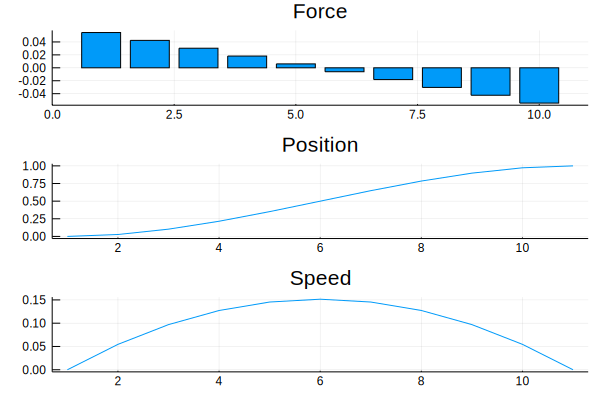

In [40]:
x = zeros(2,11);
for i = 1:10
  x[:,i+1] = A*x[:, i] + b*p_star[i]
end
p1=bar(p_star, title="Force",legend=false)
p2=plot(x[1,:], title="Position",legend=false)
p3=plot(x[2,:], title="Speed",legend=false)
plot(p1, p2, p3, layout=(3,1))

**Exercise:** Consider the same optimization problem as before with one added constraint. In addition to requiring $x[10]=1$ and $\dot{x}[10]=0$, we require that $x[5] = 0$. 

Solve this optimization problem and store the optimizing value of $p\in R^{10}$ in a variable called ```p_star```. 

Hints:
- You only need to add one other constraint/equation to the previous problem
- You need to let $k=5$ in the second relation provided to derive this constraint/equation and it will involve $p_1, \dots,p_5$

In [41]:
# BEGIN SOLUTION
p = Variable(10)

objective = sumsquares(p)

constraints = [C*p == [1; 0], (C[:,6:10]*p[1:5])[1] == 0]

problem = minimize(objective, constraints)
solve!(problem, SCSSolver())

p_star = p.value
p_1 = problem.optval

----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 41, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 13, constraints m = 19
Cones:	primal zero / dual free vars: 4
	linear vars: 1
	soc vars: 14, soc blks: 2
Setup time: 3.02e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 3.03e+19  2.09e+19  1.00e+00 -6.59e+19  1.08e+17  4.94e+19  2.34e-05 
    40| 4.80e-11  2.80e-11  5.78e-12  6.21e-02  6.21e-02  1.04e-16  2.42e-04 
----------------------------------------

0.06212121213325753

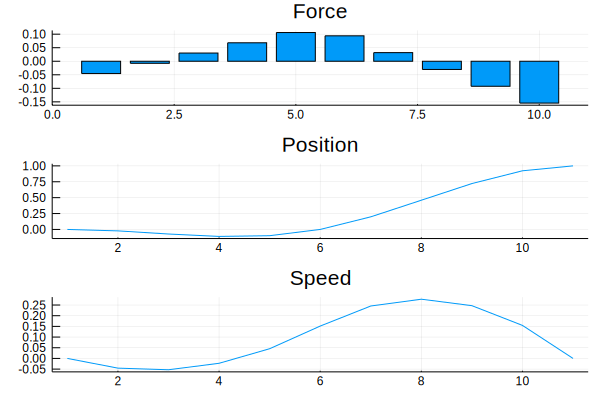

In [42]:
x = zeros(2,11);
for i = 1:10
  x[:,i+1] = A*x[:, i] + b*p_star[i]
end
p1=bar(p_star, title="Force",legend=false)
p2=plot(x[1,:], title="Position",legend=false)
p3=plot(x[2,:], title="Speed",legend=false)
plot(p1, p2, p3, layout=(3,1))

**Exercise:** Do both solutions make sense? Explain.

Answer: Yes. For the first problem, the most efficient solution is to accelerate to the maximum speed and decelerate down to 0. For the second problem, however, since the it must be at position 0 at ```k = 5```, the most efficient solution is to reach position 0 with speed (i.e. accelerate beforehand, and NOT remain stationary until ```k = 5```) in order to reach a maximum speed with less force required, which is what the solution demonstrates. 

----------------